## Data Description:

We use the following representation to collect the dataset

1. age - Age
2. bp - Blood Pressure
3. sg - Specific Gravity
4. al - Albumin
5. su - Sugar
6. rbc - Red Blood Cells
7. pc - Pus Cell
8. pcc - Pus Cell Clumps
9. ba - Bacteria
10. bgr - Blood Glucose Random
11. bu - Blood Urea
12. sc - Serum Creatinine
13. sod - Sodium
14. pot - Potassium
15. hemo - Hemoglobin
16. pcv - Packed Cell Volume
17. wc - White Blood Cell Count
18. rc - Red Blood Cell Count
19. htn - Hypertension
20. dm - Diabetes Mellitus
21. cad - Coronary Artery Disease
22. appet - Appetite
23. pe - Pedal Edema
24. ane - Anemia
25. classification - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']] = df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']].replace(to_replace={'\t8400':'8400', '\t6200':'6200', '\t43':'43', '\t?':np.nan, '\tyes':'yes', '\tno':'no', 'ckd\t':'ckd', ' yes':'yes'})

In [5]:
df.drop('id',axis=1,inplace=True)

'pcv' and 'hemo' feature has about **85% multicollinearity**. So, we remove one of the feature. i.e **pcv**

In [6]:
df.drop(['htn', 'appet', 'al', 'pcv', 'sc'], axis = 1, inplace = True)
df

,age,bp,sg,su,rbc,pc,pcc,ba,bgr,bu,sod,pot,hemo,wc,rc,dm,cad,pe,ane,classification
0,48.0,80.0,1.020,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,NaN,NaN,15.4,7800,5.2,yes,no,no,no,ckd
1,7.0,50.0,1.020,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,NaN,NaN,11.3,6000,NaN,no,no,no,no,ckd
2,62.0,80.0,1.010,3.0,normal,normal,notpresent,notpresent,423.0,53.0,NaN,NaN,9.6,7500,NaN,yes,no,no,yes,ckd
3,48.0,70.0,1.005,0.0,normal,abnormal,present,notpresent,117.0,56.0,111.0,2.5,11.2,6700,3.9,no,no,yes,yes,ckd
4,51.0,80.0,1.010,0.0,normal,normal,notpresent,notpresent,106.0,26.0,NaN,NaN,11.6,7300,4.6,no,no,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,normal,normal,notpresent,notpresent,140.0,49.0,150.0,4.9,15.7,6700,4.9,no,no,no,no,notckd
396,42.0,70.0,1.025,0.0,normal,normal,notpresent,notpresent,75.0,31.0,141.0,3.5,16.5,7800,6.2,no,no,no,no,notckd
397,12.0,80.0,1.020,0.0,normal,normal,notpresent,notpresent,100.0,26.0,137.0,4.4,15.8,6600,5.4,no,no,no,no,notckd
398,17.0,60.0,1.025,0.0,normal,normal,notpresent,notpresent,114.0,50.0,135.0,4.9,14.2,7200,5.9,no,no,no,no,notckd


In [7]:
df[['wc', 'rc']] = df[['wc', 'rc']].astype('float64')

In [8]:
df.shape

(400, 20)

In [9]:
df['rbc'] = df['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
df['pc'] = df['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [10]:
df['pcc'] = df['pcc'].replace(to_replace = {'notpresent':0,'present':1})
df['ba'] = df['ba'].replace(to_replace = {'notpresent':0,'present':1})

In [11]:
df['cad'] = df['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})
df['dm'] = df['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [12]:
df['pe'] = df['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})
df['ane'] = df['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [13]:
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

In [14]:
df.head()

,age,bp,sg,su,rbc,pc,pcc,ba,bgr,bu,sod,pot,hemo,wc,rc,dm,cad,pe,ane,classification
0,48.0,80.0,1.020,0.0,NaN,0.0,0.0,0.0,121.0,36.0,NaN,NaN,15.4,7800.0,5.2,1.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,0.0,NaN,0.0,0.0,0.0,NaN,18.0,NaN,NaN,11.3,6000.0,NaN,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,3.0,0.0,0.0,0.0,0.0,423.0,53.0,NaN,NaN,9.6,7500.0,NaN,1.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,0.0,0.0,1.0,1.0,0.0,117.0,56.0,111.0,2.5,11.2,6700.0,3.9,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,0.0,0.0,0.0,0.0,0.0,106.0,26.0,NaN,NaN,11.6,7300.0,4.6,0.0,0.0,0.0,0.0,1.0


In [15]:
features = ['age', 'bp', 'sg', 'su', 'rbc', 'pc', 'pcc', 'dm', 'ba', 'bgr', 'bu', 'sod', 'pot', 'hemo', 'wc', 'rc', 'cad', 'pe', 'ane']
for feature in features:
    df[feature] = df[feature].fillna(df[feature].median())
df.head()

,age,bp,sg,su,rbc,pc,pcc,ba,bgr,bu,sod,pot,hemo,wc,rc,dm,cad,pe,ane,classification
0,48.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,121.0,36.0,138.0,4.4,15.4,7800.0,5.2,1.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,0.0,0.0,0.0,0.0,0.0,121.0,18.0,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,3.0,0.0,0.0,0.0,0.0,423.0,53.0,138.0,4.4,9.6,7500.0,4.8,1.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,0.0,0.0,1.0,1.0,0.0,117.0,56.0,111.0,2.5,11.2,6700.0,3.9,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,0.0,0.0,0.0,0.0,0.0,106.0,26.0,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,0.0,1.0


In [16]:
df.describe()

,age,bp,sg,su,rbc,pc,pcc,ba,bgr,bu,sod,pot,hemo,wc,rc,dm,cad,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.395000,0.117500,0.190000,0.105000,0.055000,145.062500,56.693000,137.631250,4.577250,12.54250,8298.500000,4.737750,0.34250,0.085000,0.190000,0.150000,0.625000
std,16.982996,13.489785,0.005434,1.040038,0.322418,0.392792,0.306937,0.228266,75.260774,49.395258,9.206332,2.821357,2.71649,2529.593814,0.841439,0.47514,0.279231,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,4.500000,2.500000,3.10000,2200.000000,2.100000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,27.000000,135.000000,4.000000,10.87500,6975.000000,4.500000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,138.000000,4.400000,12.65000,8000.000000,4.800000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,61.750000,141.000000,4.800000,14.62500,9400.000000,5.100000,1.00000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,163.000000,47.000000,17.80000,26400.000000,8.000000,1.00000,1.000000,1.000000,1.000000,1.000000


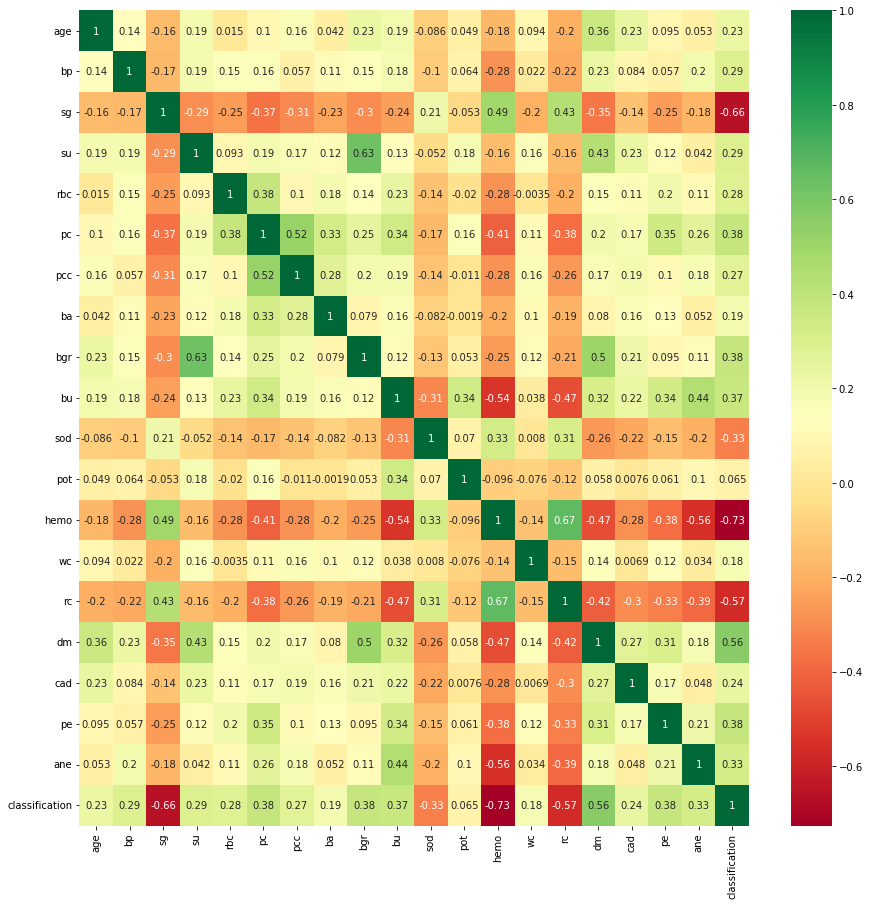

In [17]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')

In [18]:
X = df.drop("classification", axis=1)
y = df["classification"]

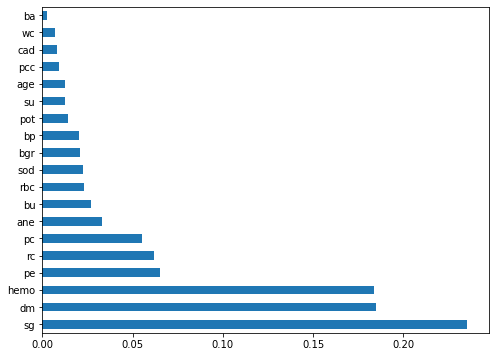

In [19]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show();

In [20]:
ranked_features.nlargest(10).index

Index(['sg', 'dm', 'hemo', 'pe', 'rc', 'pc', 'ane', 'bu', 'rbc', 'sod'], dtype='object')

In [21]:
X = df[['sg', 'dm', 'hemo', 'pe', 'pc', 'rc', 'ane', 'bu', 'sod', 'bgr']]

In [22]:
X[['dm', 'pe', 'pc', 'ane']] = X[['dm', 'pe', 'pc', 'ane']].apply(lambda x:x.astype('int64'))
X.head()

,sg,dm,hemo,pe,pc,rc,ane,bu,sod,bgr
0,1.020,1,15.4,0,0,5.2,0,36.0,138.0,121.0
1,1.020,0,11.3,0,0,4.8,0,18.0,138.0,121.0
2,1.010,1,9.6,0,0,4.8,1,53.0,138.0,423.0
3,1.005,0,11.2,1,1,3.9,1,56.0,111.0,117.0
4,1.010,0,11.6,0,0,4.6,0,26.0,138.0,106.0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [24]:
from sklearn import svm
svm = svm.SVC(gamma=0.025, C=5, probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
#print("Precision:",metrics.precision_score(y_test, y_pred_svm))
#print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.775


In [25]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#print(classification_report(y_test, y_pred_lr))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
#print("Precision:",metrics.precision_score(y_test, y_pred_lr))
#print("Recall:",metrics.recall_score(y_test, y_pred_lr))

Accuracy: 0.9083333333333333


In [26]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

Accuracy: 0.95


In [27]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

Accuracy: 0.9583333333333334


In [28]:
patient = np.array([[1.015, 1, 11.40, 1, 0, 4.1, 0, 46.0, 138.0, 203.0]])
pred = RandomForest.predict(patient)

if pred == 1:
    print("Patient has Kidney Disease")
if pred == 0:
    print("Patient does not have Kidney Disease")

Patient has Kidney Disease


In [29]:
patient = np.array([[1.025,0,15.90,0,0,4.7,0,49.0, 138.0, 121.0]])
pred = RandomForest.predict(patient)

if pred == 1:
    print("Patient has Kidney Disease")
if pred == 0:
    print("Patient does not have Kidney Disease")

Patient does not have Kidney Disease


In [30]:
import warnings
import pickle
warnings.filterwarnings("ignore")

In [31]:
pickle.dump(RandomForest,open('kidney.pkl','wb'))